In [81]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Filters import KALMANFILTER
from Hypotesises import PDA ,GNN
# from JPDA_PRO import JPDA
from Trajectory import Trajectory
from JPDA_FILTER import JPDA
from scipy.stats import poisson,  norm ,uniform

use_constant_p_false_alarm = False


In [82]:
tr1 = Trajectory('cv','cv')
tr2 = Trajectory("cv",'cv')

B = np.zeros((4,2))
U = np.zeros((2,1))

# ground_truth1 = np.array([[0],[1],[20],[-1]])
# ground_truth2 = np.array([[0],[1],[-1],[+1]])

ground_truth1 = np.array([[0],[1],[20],[-1]])
ground_truth2 = np.array([[0],[1],[0],[+1]])

time = 30

std1 = 5
std2 = 5

for T in range(time-1):

    ground_truth1 = np.append( ground_truth1 ,tr1(ground_truth1[:,[-1]], B,U,T,'normal' ,0, std1  ),axis=-1)
    ground_truth2 = np.append( ground_truth2 ,tr2(ground_truth2[:,[-1]], B,U,T,'normal' ,0, std2 ),axis=-1)

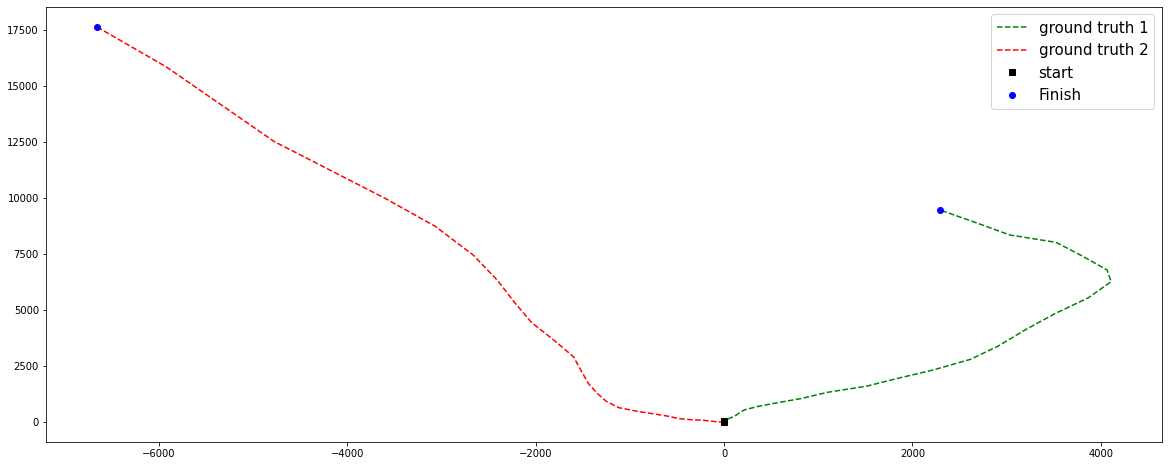

In [83]:
plt.figure(figsize=(20,8))

plt.plot(ground_truth1[0],ground_truth1[2],'--g',label="ground truth 1")
plt.plot(ground_truth2[0],ground_truth2[2],'--r',label="ground truth 2")

plt.plot(ground_truth1[0][0],ground_truth1[2][0],'ks',)
plt.plot(ground_truth2[0][0],ground_truth2[2][0],'ks',label="start")

plt.plot(ground_truth1[0][-1],ground_truth1[2][-1],'bo',)
plt.plot(ground_truth2[0][-1],ground_truth2[2][-1],'bo',label="Finish")

plt.legend(fontsize=15)
plt.show()

# تولید مشاهدات

In [84]:
def sensor(x ,bias ,std_):
    return np.array([ x[0].flatten(), x[2].flatten()]) + np.random.normal(loc= 0 ,scale=std_)


pd1 = 1
pd2 = 1
bias = 0 ;std= 25
max_number_of_clutters= 10

ALL_measurements=[]
for T in range(time):

    pack={'clutter':np.empty((2,0))}

    if np.random.choice([0 , 1], p=[1-pd1 ,pd1]):

        real1 = sensor(ground_truth1[:,[T]] , bias , std)
        pack['real1'] = real1
    else:

        pack['real1'] = np.nan * np.ones((2,1))

    if np.random.choice([0 , 1], p=[1-pd2 ,pd2]):

        real2 = sensor(ground_truth2[:,[T]] , bias , std)
        pack['real2'] = real2
    else:

        pack['real2'] = np.nan * np.ones((2,1))

    
    # create clutters

    n_clutter = np.random.randint(max_number_of_clutters) if max_number_of_clutters!=0 else 0

    if n_clutter==0:
        pack['clutter'] = np.nan * np.ones((2,2))
        pack['time'] = [T]*2
    else:

        X1 = ground_truth1[ [0] , [T]]
        X2 = ground_truth2[ [0] ,[T]]
        Y1 = ground_truth1[ [2] ,[T]]
        Y2 = ground_truth2[[2] , [T]]

        for _ in range(n_clutter):

            cx1 = uniform.rvs(X1-10*std ,20*std)
            cx2 = uniform.rvs(X2- 10*std ,  20*std)
            cy1 = uniform.rvs(Y1- 10*std ,      20*std)
            cy2 = uniform.rvs(Y2- 10*std ,      20*std)

            clutter1 = np.array([[cx1],[cy1]])
            clutter2 = np.array([[cx2],[cy2]])

            pack['clutter'] = np.append(pack['clutter'] ,np.hstack([clutter1 ,clutter2]) ,axis=-1)

        pack['time'] = [T] * n_clutter*2
        
    ALL_measurements.append(pack)


ALL_measurements = pd.DataFrame(ALL_measurements )
ALL_measurements




,clutter,real1,real2,time
0,"[[nan, nan], [nan, nan]]","[[12.02815565203296], [32.028155652032964]]","[[-15.089650190606227], [-15.089650190606227]]","[0, 0]"
1,"[[76.09947215571674, -48.85598833805983, -96.7...","[[-22.248180747351682], [5.233979255274866]]","[[24.58161906524533], [21.52806047191422]]","[1, 1, 1, 1, 1, 1, 1, 1]"
2,"[[35.44949141111198, -218.38375232429848, -71....","[[-33.25875239870089], [1.530930120885568]]","[[21.339371387419494], [20.91335726633566]]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]"
3,"[[44.1567041584114, -37.34767090908713, -126.4...","[[2.896055025454803], [36.981506361226394]]","[[-54.51318217859947], [-34.40482277682861]]","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]"
4,"[[-39.28703136167215, 176.6241330697606, 153.8...","[[18.72930172692287], [60.58446156805794]]","[[-36.296184794613815], [11.807079064049688]]","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]"
5,"[[218.3912671652433, -376.89600047103755, 152....","[[-30.192065595419553], [14.27933050299323]]","[[-146.72467588977045], [9.597969096238202]]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]"
6,"[[183.42119246324768, -358.06753578543197, -19...","[[-27.627744123478237], [52.995212197874]]","[[-244.062299081294], [53.8182539455355]]","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]"
7,"[[246.64423997562196, -582.5314245232676, 285....","[[63.97304061996438], [155.1392985523772]]","[[-365.4971783203257], [80.02541959170166]]","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ..."
8,"[[-74.79322648347362, -577.4962293200524, -9.7...","[[131.8182099945431], [266.7718743109486]]","[[-479.525087851521], [147.51958767620803]]","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]"
9,"[[235.76729446437113, -634.0296165459299, 341....","[[166.80293524865206], [384.97244309487314]]","[[-557.6235258052441], [262.3323199146382]]","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]"


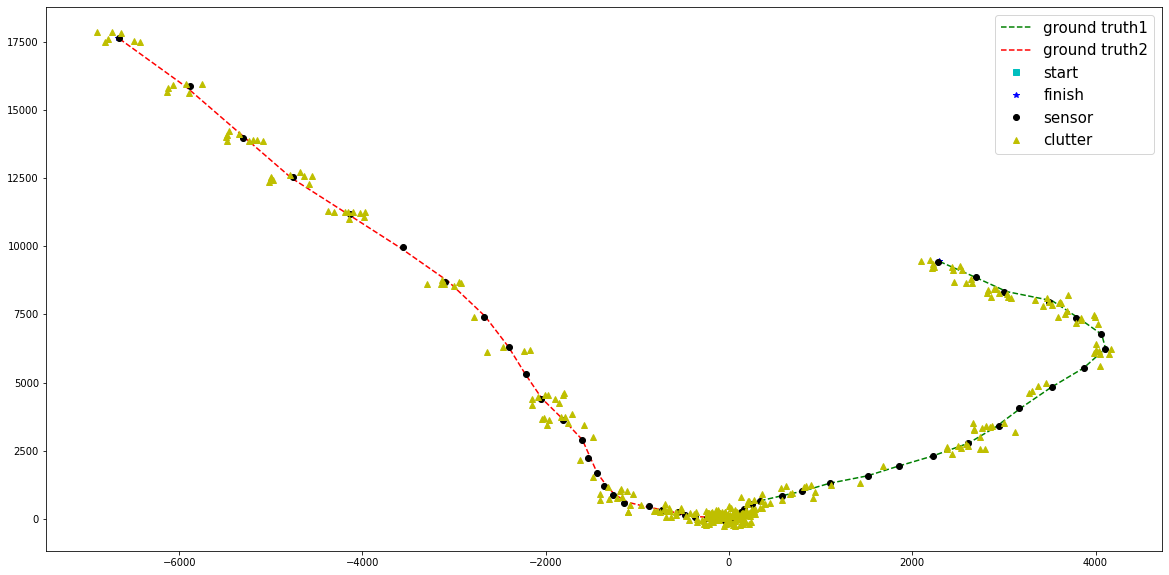

In [85]:
real1 =np.hstack(ALL_measurements['real1'])
real2 =np.hstack(ALL_measurements['real2'])
clutters = np.hstack(ALL_measurements['clutter'])
time_for_clutter = np.hstack(ALL_measurements['time'])

plt.figure(figsize= (20,10))
plt.plot(ground_truth1[0],ground_truth1[2],'g--',label ='ground truth1')
plt.plot(ground_truth2[0],ground_truth2[2],'r--',label='ground truth2')

plt.plot(ground_truth1[0,[0]],ground_truth1[2,[0]],'cs',label='start')
plt.plot(ground_truth2[0,[0]],ground_truth2[2,[0]],'cs')
plt.plot(ground_truth1[0][-1],ground_truth1[2][-1],'b*',label='finish')
plt.plot(ground_truth2[0][-1],ground_truth2[2][-1],'b*')

plt.plot(real1[0],real1[1],'ko',label='sensor')
plt.plot(real2[0],real2[1],'ko')
plt.plot(clutters[0],clutters[1],'^y',label='clutter')



plt.legend(fontsize=15)
plt.show()

# JPDA ردیابی با کمک الگوریتم 

In [86]:
p_false_alarm = 0.25 ; 
sensor_cov = np.identity(2) * std**2
jpda = JPDA(p_false_alarm , sensor_cov,use_constant_p_false_alarm)

# تعریف فیلتر کالمن

In [87]:
S1 = ground_truth1[:,[0]]
S2 = ground_truth2[:,[0]]
P1 = np.identity(4)
P2 = np.identity(4)

state_cov1 = np.diag([1.5,0.5,1.5,0.5])*std1**2
state_cov2 = np.diag([1.5,0.5,1.5,0.5])*std2**2

B = np.zeros((4,2)) ;  U  = np.zeros((2,1)) ; C =np.array([[1,0,0,0],[0,0,1,0]])

kalman1 = KALMANFILTER(tr1 ,B, C ,state_cov1 , sensor_cov)
kalman2 = KALMANFILTER(tr2 ,B, C ,state_cov2 , sensor_cov)
#        گیتهایی که درست بودن 
gate1 = 4  # 5 , 25 ,24 ,20 ,18
gate2 = 4  # 8  , 5  ,5  ,5  ,5

track1=[] ; track2=[] ; weight1 =[] ;weight2=[] ; valid1=[] ; valid2=[] ; time_for_valid1=[] ; time_for_valid2=[]; 


In [88]:
for T in range(time):

    S1 , P1 = kalman1.predict(S1,P1,U,T)

    S2 , P2 = kalman2.predict(S2,P2,U,T)

    target1 = {'state':S1 ,'P':P1, 'Z_hat': C@S1 ,'C':C, 'gate':gate1 ,'PD':pd1 }
    target2 = {'state':S2 ,'P':P2, 'Z_hat': C@S2 ,'C':C, 'gate':gate2 ,'PD':pd2 }

    Z = np.hstack(ALL_measurements[['real1','real2','clutter']].loc[T])

    t1,t2 = jpda.Correct(Z,*(target1 ,target2))

    S1,P1 = t1['state'] ,t1['P']
    S2,P2 = t2['state'] ,t2['P']
    
    weight1.append(list(t1['likelihood'].values()) if t1['likelihood'] else np.nan  ) ; 
    weight2.append(list(t2['likelihood'].values()) if t2['likelihood'] else np.nan  ); 


    valid1.append(np.hstack(list(t1['valid_m'].values()))  if t1['valid_m'] else np.nan*np.ones((2,1)) )  
    valid2.append(np.hstack(list(t2['valid_m'].values()) )  if t2['valid_m'] else np.nan*np.ones((2,1)) ) ; 

    time_for_valid1.extend([T] *  valid1[-1].shape[-1])
    time_for_valid2.extend( [T] * valid2[-1].shape[-1])

    track1.append(S1) ;track2.append(S2)



In [89]:
track1_jpda = np.hstack(track1)
track2_jpda = np.hstack(track2)

weight1_jpda = np.hstack(weight1) ; weight2_jpda = np.hstack(weight2); 
valid1_jpda = np.hstack(valid1)  ; valid2_jpda =np.hstack(valid2)



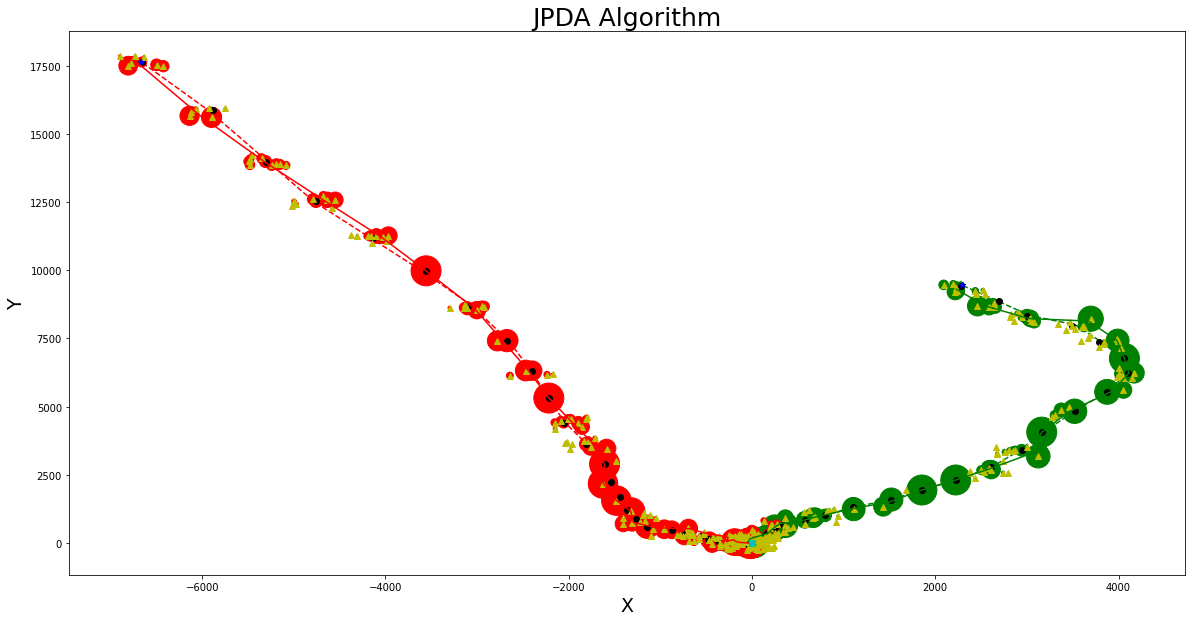

In [90]:
real1 =np.hstack(ALL_measurements['real1'])
real2 =np.hstack(ALL_measurements['real2'])
clutters = np.hstack(ALL_measurements['clutter'])
time_for_clutter = np.hstack(ALL_measurements['time'])

plt.figure(figsize= (20,10))
plt.plot(ground_truth1[0],ground_truth1[2],'g--',label ='ground truth1')
plt.plot(ground_truth2[0],ground_truth2[2],'r--',label='ground truth2')

plt.plot(real1[0],real1[1],'ko',label='sensor')
plt.plot(real2[0],real2[1],'ko')
plt.plot(clutters[0],clutters[1],'^y',label='clutter')

plt.plot(track1_jpda[0],track1_jpda[2],'g',label='track1')
plt.plot(track2_jpda[0],track2_jpda[2],'r',label='track2')

plt.scatter(valid1_jpda[0],valid1_jpda[1],s=np.where(weight1_jpda>0.6 ,weight1_jpda*900 , weight1_jpda*900),color='g',label='valid measurements track 1')
plt.scatter(valid2_jpda[0],valid2_jpda[1],s=np.where(weight2_jpda>0.6 ,weight2_jpda*900 , weight2_jpda*900),color='r',label='valid measurements track 2')

plt.plot(ground_truth1[0,[0]],ground_truth1[2,[0]],'cs',label='start')
plt.plot(ground_truth2[0,[0]],ground_truth2[2,[0]],'cs')
plt.plot(ground_truth1[0][-1],ground_truth1[2][-1],'b*',label='finish')
plt.plot(ground_truth2[0][-1],ground_truth2[2][-1],'b*')

plt.title('JPDA Algorithm',fontdict={'fontsize':25})
# plt.legend()
plt.xlabel('X',fontdict={'fontsize':19})
plt.ylabel('Y',fontdict={"fontsize":19})
plt.show()

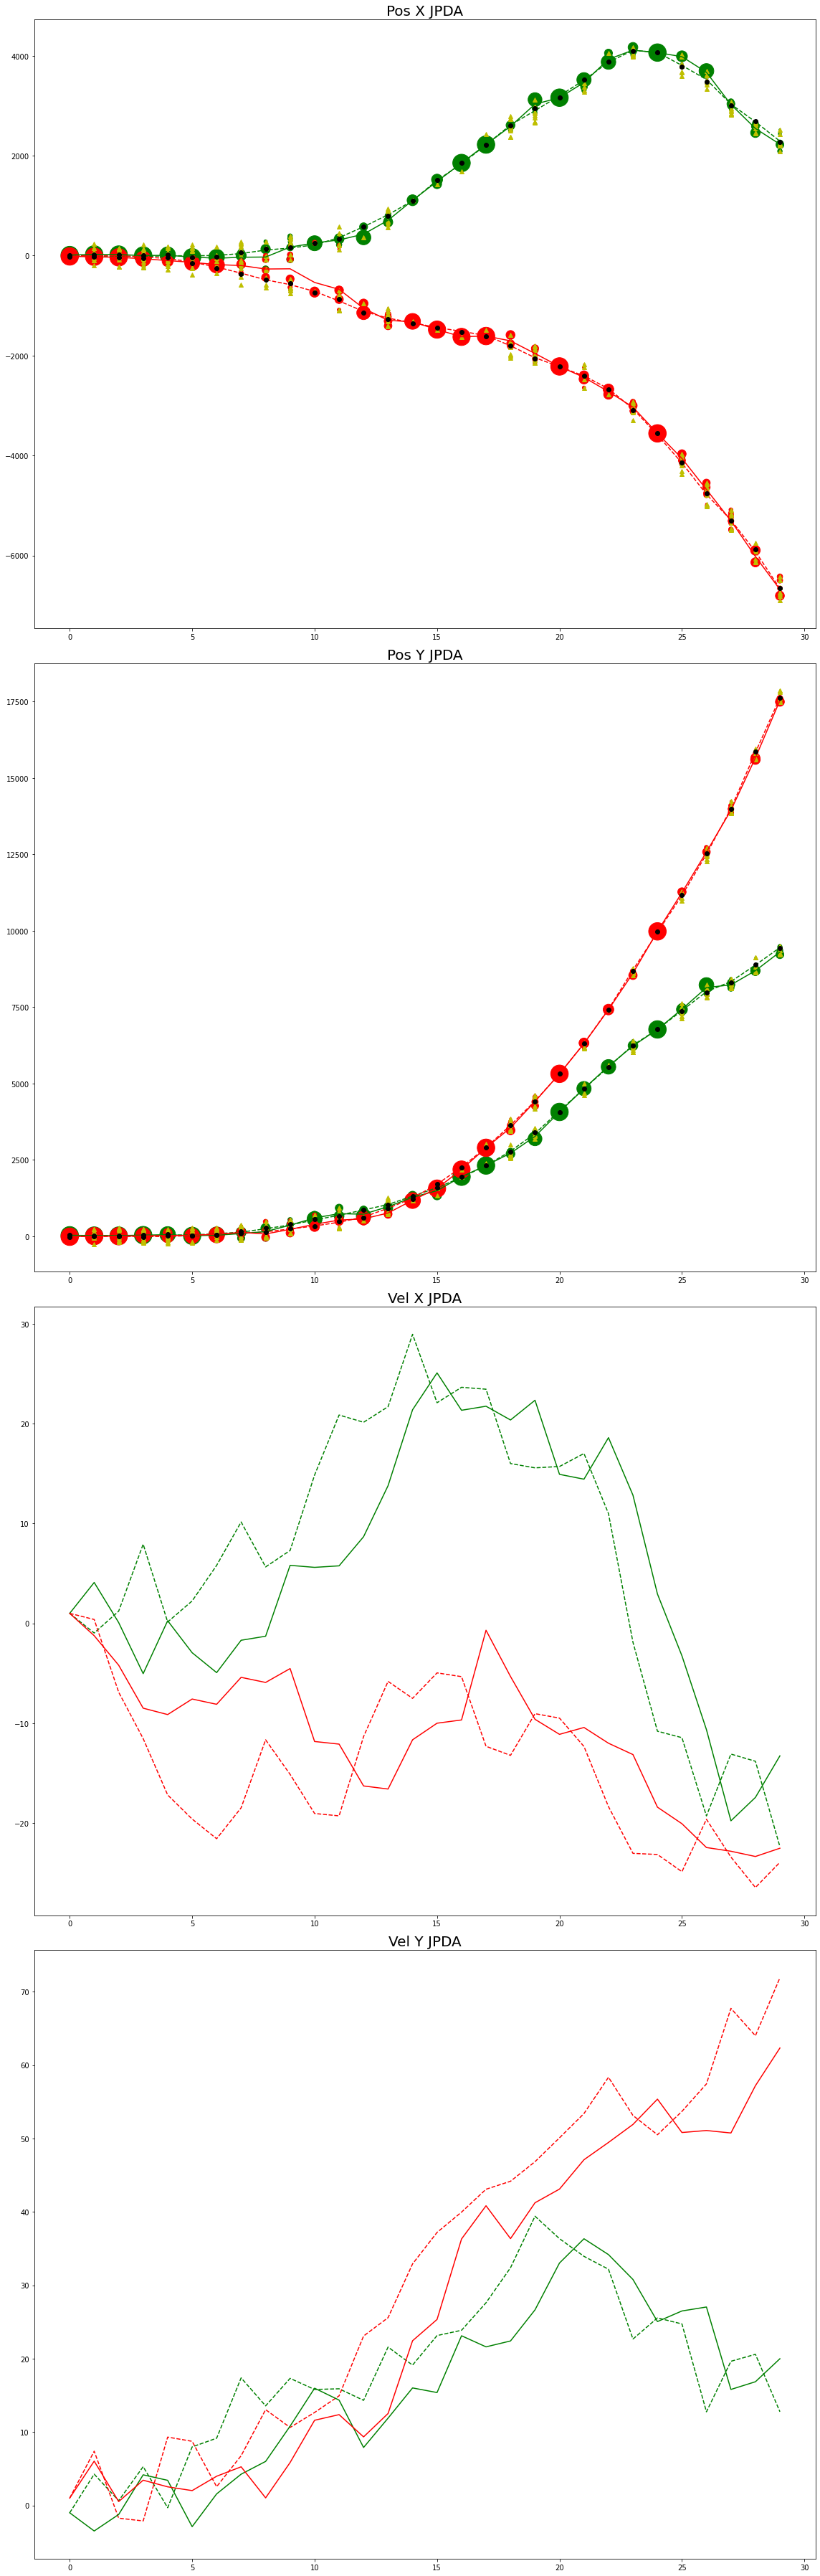

In [91]:
fig ,ax = plt.subplots(4,1,figsize=(16,50))

ax[0].set_title("Pos X JPDA",fontsize=20)
ax[0].plot(ground_truth1[0],'g--',label='ground truth1')
ax[0].plot(ground_truth2[0],'r--',label='ground truth2')
ax[0].plot(time_for_clutter ,clutters[0],'y^',label='clutter')
ax[0].plot(track1_jpda[0],'g',label='track1')
ax[0].plot(track2_jpda[0],'r',label='track2')
ax[0].plot(real1[0],'ko',label='sensor')
ax[0].plot(real2[0],'ko')
ax[0].scatter(time_for_valid1,valid1_jpda[0],s=np.where(weight1_jpda>0.6 ,weight1_jpda*600 , weight1_jpda*400),color='g',label='valid measurements track 1')
ax[0].scatter(time_for_valid2,valid2_jpda[0],s=np.where(weight2_jpda>0.6 ,weight2_jpda*600 , weight2_jpda*400),color='r',label='valid measurements track 2')
# ax[0].legend(fontsize=15)

ax[1].set_title("Pos Y JPDA",fontsize=20)
ax[1].plot(ground_truth1[2],'g--',label='ground truth1')
ax[1].plot(ground_truth2[2],'r--',label='ground truth2')
ax[1].plot(time_for_clutter ,clutters[1],'y^',label='clutter')
ax[1].plot(track1_jpda[2],'g',label='track1')
ax[1].plot(track2_jpda[2],'r',label='track2')
ax[1].plot(real1[1],'ko',label='sensor')
ax[1].plot(real2[1],'ko')
ax[1].scatter(time_for_valid1,valid1_jpda[1],s=np.where(weight1_jpda>0.6 ,weight1_jpda*600 , weight1_jpda*400),color='g',label='valid measurements track 1')
ax[1].scatter(time_for_valid2,valid2_jpda[1],s=np.where(weight2_jpda>0.6 ,weight2_jpda*600 , weight2_jpda*400),color='r',label='valid measurements track 2')
# ax[1].legend(fontsize=15)

ax[2].set_title("Vel X JPDA",fontsize=20)
ax[2].plot(ground_truth1[1],'g--',label='ground truth1')
ax[2].plot(ground_truth2[1],'r--',label='ground truth2')
ax[2].plot(track1_jpda[1],'g',label='track1')
ax[2].plot(track2_jpda[1],'r',label='track2')
# ax[2].legend(fontsize=15)

ax[3].set_title("Vel Y JPDA",fontsize=20)
ax[3].plot(ground_truth1[-1],'g--',label='ground truth1')
ax[3].plot(ground_truth2[-1],'r--',label='ground truth2')
ax[3].plot(track1_jpda[-1],'g',label='track1')
ax[3].plot(track2_jpda[-1],'r',label='track2')
# ax[3].legend(fontsize=15)
plt.tight_layout()

# PDA شبیه سازی با الگوریتم 

In [92]:
pda1 = PDA(gate1 , state_cov1 ,sensor_cov, pd1 , p_false_alarm,use_constant_p_false_alarm)
pda2 = PDA(gate2 , state_cov2 ,sensor_cov, pd2 , p_false_alarm ,use_constant_p_false_alarm)

S1 = ground_truth1[:,[0]]
S2 = ground_truth2[:,[0]]
P1 = np.identity(4)
P2 = np.identity(4)

state_cov1 = np.diag([1.5,0.5,1.5,0.5])*std1**2
state_cov2 = np.diag([1.5,0.5,1.5,0.5])*std2**2

B = np.zeros((4,2)) ;  U  = np.zeros((2,1)) ; C =np.array([[1,0,0,0],[0,0,1,0]])

kalman1 = KALMANFILTER(tr1 ,B, C ,state_cov1 , sensor_cov)
kalman2 = KALMANFILTER(tr2 ,B, C ,state_cov2 , sensor_cov)


track1=[] ; track2=[] ; weight1 =[] ;weight2=[] ; valid1=[] ; valid2=[] ; time_for_valid1=[] ; time_for_valid2=[]; 



#  اجرای الگوریتم

In [93]:
for T in range(time):

    S1 , P1 = kalman1.predict(S1,P1,U,T)

    S2 , P2 = kalman2.predict(S2,P2,U,T)

    # target1 = {'state':S1 ,'P':P1, 'Z_hat': C@S1 ,'C':C, 'gate':gate1 ,'PD':pd1 }
    # target2 = {'state':S2 ,'P':P2, 'Z_hat': C@S2 ,'C':C, 'gate':gate2 ,'PD':pd2 }

    Z = np.hstack(ALL_measurements[['real1','real2','clutter']].loc[T])

    S1, P1 , v1 ,b1 = pda1.Correcet(S1,P1,C,Z, C @ S1)
    S2, P2 , v2, b2 = pda2.Correcet(S2,P2,C,Z, C @ S2)
    
    weight1.append( b1 ) ; 
    weight2.append( b2 ); 

    valid1.append( v1 )  ; valid2.append(v2) ; 

    time_for_valid1.extend([T] *  valid1[-1].shape[-1])
    time_for_valid2.extend( [T] * valid2[-1].shape[-1])

    track1.append(S1) ;track2.append(S2)



In [94]:
track1_pda = np.hstack(track1)
track2_pda = np.hstack(track2)

weight1_pda = np.hstack(weight1) ; weight2_pda = np.hstack(weight2); 
valid1_pda = np.hstack(valid1)  ; valid2_pda =np.hstack(valid2)

# نتایج شبیه‌سازی

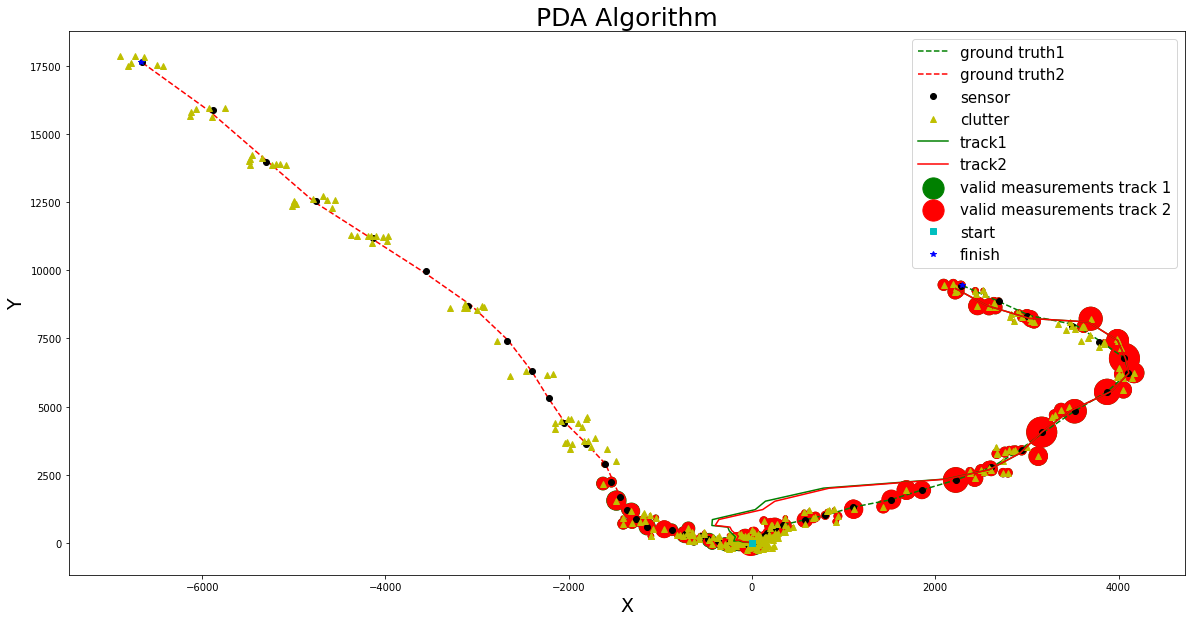

In [95]:
real1 =np.hstack(ALL_measurements['real1'])
real2 =np.hstack(ALL_measurements['real2'])
clutters = np.hstack(ALL_measurements['clutter'])
time_for_clutter = np.hstack(ALL_measurements['time'])

plt.figure(figsize= (20,10))
plt.plot(ground_truth1[0],ground_truth1[2],'g--',label ='ground truth1')
plt.plot(ground_truth2[0],ground_truth2[2],'r--',label='ground truth2')


plt.plot(real1[0],real1[1],'ko',label='sensor')
plt.plot(real2[0],real2[1],'ko')
plt.plot(clutters[0],clutters[1],'^y',label='clutter')

plt.plot(track1_pda[0],track1_pda[2],'g',label='track1')
plt.plot(track2_pda[0],track2_pda[2],'r',label='track2')

plt.scatter(valid1_pda[0],valid1_pda[1],s=np.where(weight1_pda>0.6 ,weight1_pda*900 , weight1_pda*900),color='g',label='valid measurements track 1')
plt.scatter(valid2_pda[0],valid2_pda[1],s=np.where(weight2_pda>0.6 ,weight2_pda*900 , weight2_pda*900),color='r',label='valid measurements track 2')

plt.plot(ground_truth1[0,[0]],ground_truth1[2,[0]],'cs',label='start')
plt.plot(ground_truth2[0,[0]],ground_truth2[2,[0]],'cs')
plt.plot(ground_truth1[0][-1],ground_truth1[2][-1],'b*',label='finish')
plt.plot(ground_truth2[0][-1],ground_truth2[2][-1],'b*')


plt.title("PDA Algorithm",fontdict={'fontsize':25})
plt.legend(fontsize=15)
plt.xlabel('X',fontdict={'fontsize':19})
plt.ylabel('Y',fontdict={"fontsize":19})
plt.show()

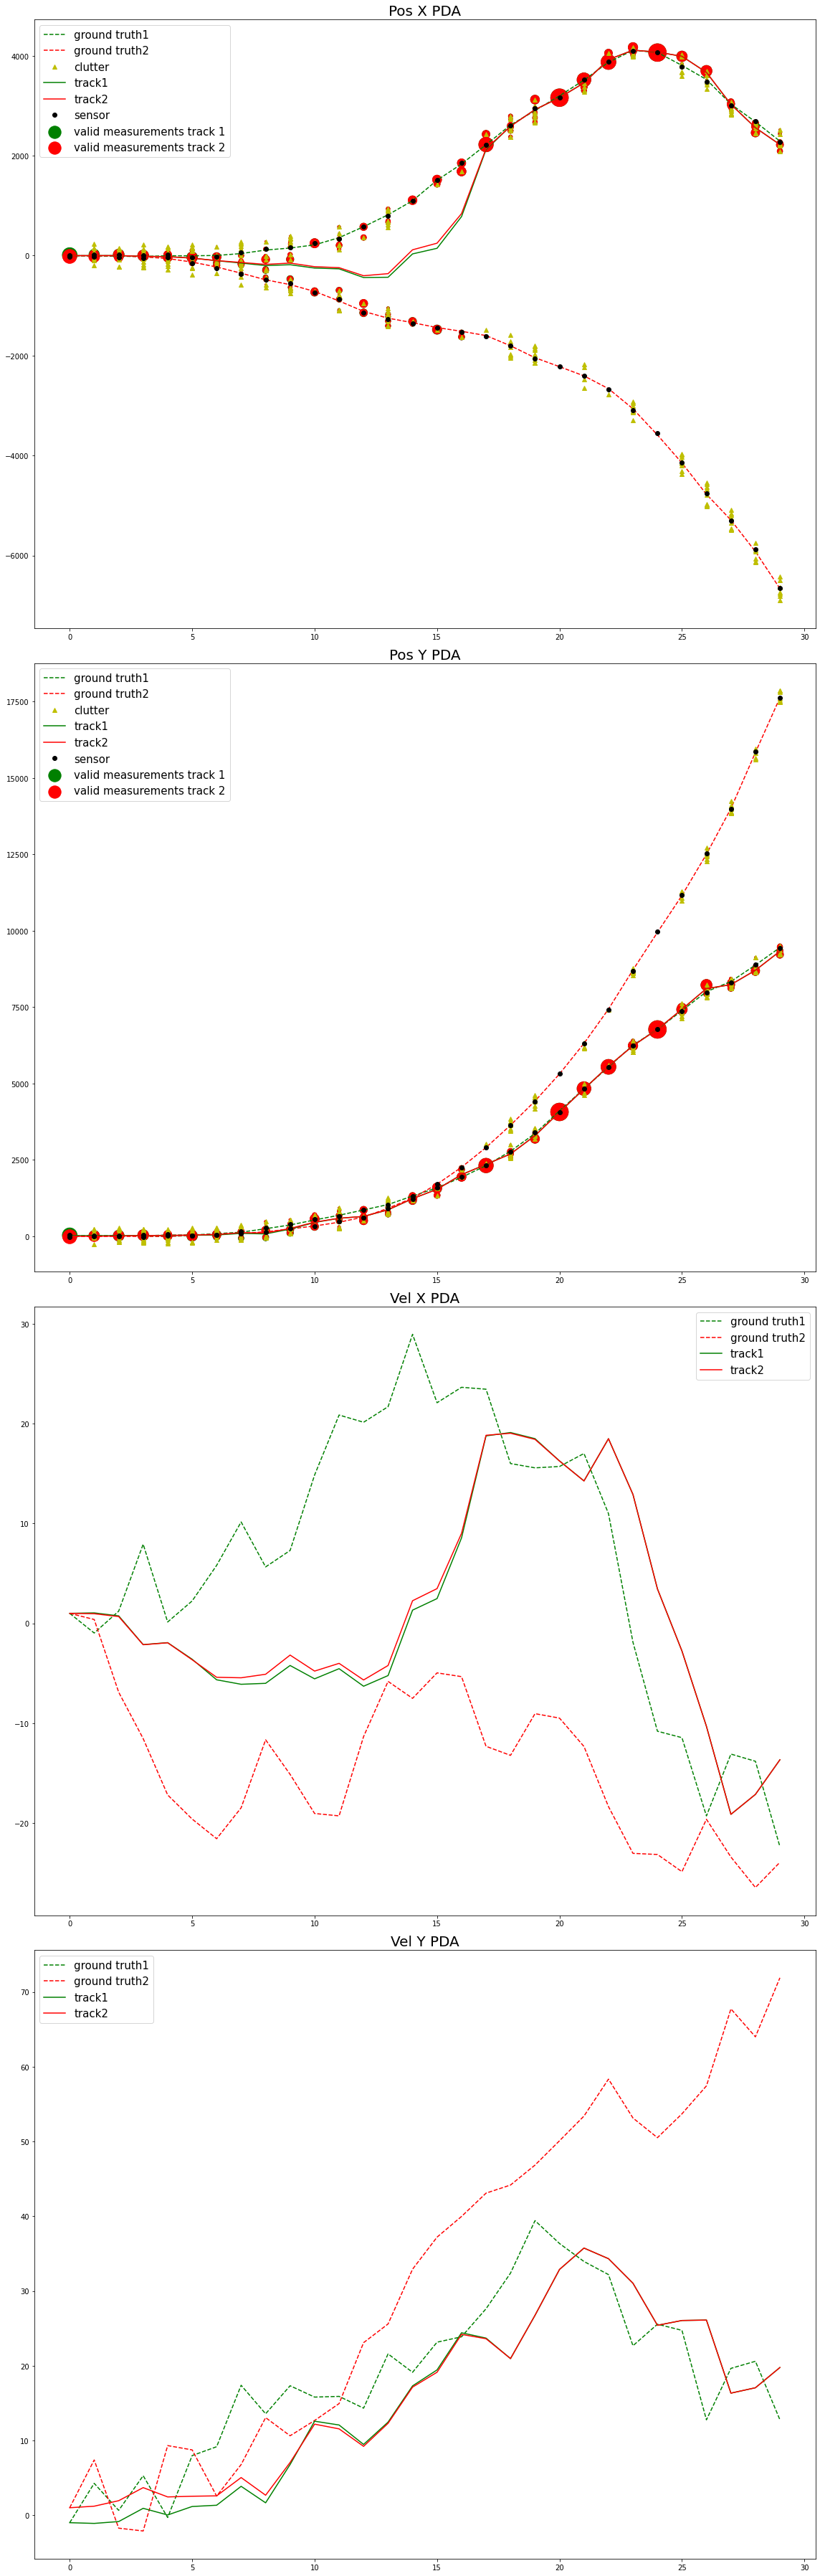

In [96]:
fig ,ax = plt.subplots(4,1,figsize=(16,50))

ax[0].set_title("Pos X PDA",fontsize=20)
ax[0].plot(ground_truth1[0],'g--',label='ground truth1')
ax[0].plot(ground_truth2[0],'r--',label='ground truth2')
ax[0].plot(time_for_clutter ,clutters[0],'y^',label='clutter')
ax[0].plot(track1_pda[0],'g',label='track1')
ax[0].plot(track2_pda[0],'r',label='track2')
ax[0].plot(real1[0],'ko',label='sensor')
ax[0].plot(real2[0],'ko')
ax[0].scatter(time_for_valid1,valid1_pda[0],s=np.where(weight1_pda>0.6 ,weight1_pda*600 , weight1_pda*400),color='g',label='valid measurements track 1')
ax[0].scatter(time_for_valid2,valid2_pda[0],s=np.where(weight2_pda>0.6 ,weight2_pda*600 , weight2_pda*400),color='r',label='valid measurements track 2')
ax[0].legend(fontsize=15)

ax[1].set_title("Pos Y PDA",fontsize=20)
ax[1].plot(ground_truth1[2],'g--',label='ground truth1')
ax[1].plot(ground_truth2[2],'r--',label='ground truth2')
ax[1].plot(time_for_clutter ,clutters[1],'y^',label='clutter')
ax[1].plot(track1_pda[2],'g',label='track1')
ax[1].plot(track2_pda[2],'r',label='track2')
ax[1].plot(real1[1],'ko',label='sensor')
ax[1].plot(real2[1],'ko')
ax[1].scatter(time_for_valid1,valid1_pda[1],s=np.where(weight1_pda>0.6 ,weight1_pda*600 , weight1_pda*400),color='g',label='valid measurements track 1')
ax[1].scatter(time_for_valid2,valid2_pda[1],s=np.where(weight2_pda>0.6 ,weight2_pda*600 , weight2_pda*400),color='r',label='valid measurements track 2')
ax[1].legend(fontsize=15)

ax[2].set_title("Vel X PDA",fontsize=20)
ax[2].plot(ground_truth1[1],'g--',label='ground truth1')
ax[2].plot(ground_truth2[1],'r--',label='ground truth2')
ax[2].plot(track1_pda[1],'g',label='track1')
ax[2].plot(track2_pda[1],'r',label='track2')
ax[2].legend(fontsize=15)

ax[3].set_title("Vel Y PDA",fontsize=20)
ax[3].plot(ground_truth1[-1],'g--',label='ground truth1')
ax[3].plot(ground_truth2[-1],'r--',label='ground truth2')
ax[3].plot(track1_pda[-1],'g',label='track1')
ax[3].plot(track2_pda[-1],'r',label='track2')
ax[3].legend(fontsize=15)
plt.tight_layout()

In [97]:
gnn = GNN(gate1 ,sensor_cov)

valid_z_gnn1=[]
valid_z_gnn2=[]
track1_gnn=[]
track2_gnn=[]
S1_gnn = ground_truth1[:,[0]]
S2_gnn = ground_truth2[:,[0]]
P1_gnn = np.identity(4)
P2_gnn = np.identity(4)

for T in range(time):

    S1_gnn ,P1_gnn = kalman1.predict(S1_gnn,P1_gnn,U,T)
    S2_gnn ,P2_gnn = kalman2.predict(S2_gnn,P2_gnn,U,T)

    Z = np.hstack(ALL_measurements[['real1','real2','clutter']].loc[T])

    H1 = gnn.get_global_neighbor(Z, C@S1_gnn ,P1_gnn,C)
    H2 = gnn.get_global_neighbor(Z, C@S2_gnn ,P2_gnn,C)
    
    valid_z_gnn1.append(H1)
    valid_z_gnn2.append(H2)


    S1_gnn ,P1_gnn,_ = kalman1.correct(S1_gnn,P1_gnn,H1)
    S2_gnn ,P2_gnn,_ = kalman2.correct(S2_gnn,P2_gnn,H2)

    track1_gnn.append(S1_gnn) ; track2_gnn.append(S2_gnn)

track1_gnn = np.hstack(track1_gnn) ; track2_gnn = np.hstack(track2_gnn) 
valid_z_gnn1 = np.hstack(valid_z_gnn1) ; valid_z_gnn2 = np.hstack(valid_z_gnn2)


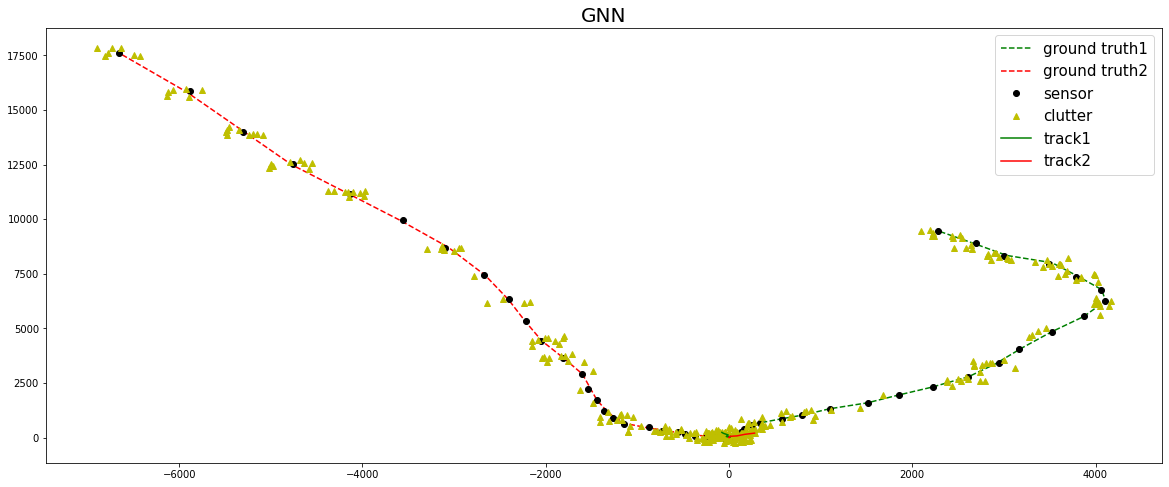

In [98]:
plt.figure(figsize=(20,8))

plt.plot(ground_truth1[0,:],ground_truth1[2,:],'g--',label='ground truth1')
plt.plot(ground_truth2[0,:],ground_truth2[2,:],'r--',label='ground truth2')

plt.plot(real1[0],real1[1],'ko',label='sensor')
plt.plot(real2[0],real2[1],'ko')
plt.plot(clutters[0],clutters[1],'^y',label='clutter')
plt.plot(track1_gnn[0],track1_gnn[2] , 'g',label='track1')
plt.plot(track2_gnn[0],track2_gnn[2] , 'r',label='track2')
plt.legend(fontsize=15)
plt.title("GNN",fontdict={'fontsize':20})
plt.show()

# Data Logging

In [99]:
# GT1 = pd.DataFrame(ground_truth1)
# GT2 = pd.DataFrame(ground_truth2)

# TR1_JPDA = pd.DataFrame(track1_jpda)
# TR2_JPDA = pd.DataFrame(track2_jpda)



# REAL1 = pd.DataFrame(real1,index = None ,columns=None)
# REAL2 = pd.DataFrame(real2,index = None ,columns=None)
# CLUTTERS = pd.DataFrame(clutters ,index = None ,columns=None)
# TR1_PDA = pd.DataFrame(track1_pda)
# TR2_PDA = pd.DataFrame(track2_pda)
# T1_gnn = pd.DataFrame(track1_gnn)
# T2_gnn = pd.DataFrame(track2_gnn)


# valid1_jpda = pd.DataFrame(valid1_jpda)
# valid2_jpda = pd.DataFrame(valid2_jpda)
# valid1_pda = pd.DataFrame(valid1_pda)
# valid2_pda = pd.DataFrame(valid2_pda)
# valid_z_gnn1 = pd.DataFrame(valid_z_gnn1)
# valid_z_gnn2  = pd.DataFrame(valid_z_gnn2)

# weight1_jpda = pd.DataFrame(weight1_jpda)
# weight2_jpda = pd.DataFrame(weight2_jpda)

# weight1_pda = pd.DataFrame(weight1_pda)
# weight2_pda = pd.DataFrame(weight2_pda)



# GT1.to_csv("c:\\users\\mohamadmahdi\\desktop\\GT1.csv",index=False,columns=None)
# GT2.to_csv("c:\\users\\mohamadmahdi\\desktop\\GT2.csv",index=False ,columns=None)

# TR1_JPDA.to_csv("c:\\users\\mohamadmahdi\\desktop\\TR1_JPDA.csv",index=False ,columns=None)
# TR2_JPDA.to_csv("c:\\users\\mohamadmahdi\\desktop\\TR2_JPDA.csv",index=False ,columns=None)

# TR1_PDA.to_csv("c:\\users\\mohamadmahdi\\desktop\\TR1_PDA.csv",index = False ,columns=None)
# TR2_PDA.to_csv("c:\\users\\mohamadmahdi\\desktop\\TR2_PDA.csv",index = False ,columns=None)

# T1_gnn.to_csv("c:\\users\\mohamadmahdi\\desktop\\T1_gnn.csv",index = False ,columns=None)
# T2_gnn.to_csv("c:\\users\\mohamadmahdi\\desktop\\T2_gnn.csv",index = False ,columns=None)

# REAL1.to_csv('c:\\users\\mohamadmahdi\\desktop\\REAL1.csv',index =None ,columns=None)
# REAL2.to_csv('c:\\users\\mohamadmahdi\\desktop\\REAL2.csv',index =None ,columns=None)
# CLUTTERS.to_csv('c:\\users\\mohamadmahdi\\desktop\\CLUTTERS.csv',index =None ,columns=None)

# valid1_jpda.to_csv('c:\\users\\mohamadmahdi\\desktop\\valid1_jpda.csv',index =None ,columns=None)
# valid2_jpda.to_csv('c:\\users\\mohamadmahdi\\desktop\\valid2_jpda.csv',index =None ,columns=None)
# valid1_pda.to_csv('c:\\users\\mohamadmahdi\\desktop\\valid1_pda.csv',index =None ,columns=None)
# valid2_pda.to_csv('c:\\users\\mohamadmahdi\\desktop\\valid2_pda.csv',index =None ,columns=None)
# valid_z_gnn1.to_csv('c:\\users\\mohamadmahdi\\desktop\\valid_z_gnn1.csv',index =None ,columns=None)
# valid_z_gnn2.to_csv('c:\\users\\mohamadmahdi\\desktop\\valid_z_gnn2.csv',index =None ,columns=None)

# weight1_jpda.to_csv('c:\\users\\mohamadmahdi\\desktop\\weight1_jpda.csv',index =None ,columns=None)
# weight2_jpda.to_csv('c:\\users\\mohamadmahdi\\desktop\\weight2_jpda.csv',index =None ,columns=None)

# weight1_pda.to_csv('c:\\users\\mohamadmahdi\\desktop\\weight1_pda.csv',index =None ,columns=None)
# weight2_pda.to_csv('c:\\users\\mohamadmahdi\\desktop\\weight2_pda.csv',index =None ,columns=None)


# ground truth  شبیه سازی توزیع کلاتر حول اولین نقطه‌ی 

In [100]:
# a=[]

# for i in range(100000):
#     a.append(uniform.rvs(-10 , 20))
# plt.figure(figsize=(20,8))
# plt.hist(a)
# plt.show()